In [3]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# === CONFIG ===
MODEL_PATH = "squirrel_vs_sparrow_cnn_256_D_2025_07_16_R_1.keras"
IMG_SIZE = 256
CLASS_NAMES = ['Cape Sparrow', 'Squirrel']

# === Load model once ===
model = tf.keras.models.load_model(MODEL_PATH)

# === Preprocessing function: pad to 256x256 while preserving aspect ratio ===
def load_and_preprocess_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = np.array(image)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize_with_pad(image, IMG_SIZE, IMG_SIZE)
    return tf.expand_dims(image, axis=0)  # shape: (1, 256, 256, 3)

# === Prediction function with visual output ===
def predict_image(image_path):
    image_tensor = load_and_preprocess_image(image_path)

    prediction = model.predict(image_tensor)[0][0]  # sigmoid output in [0, 1]
    predicted_index = int(round(prediction))        # 0 → Cape Sparrow, 1 → Squirrel
    predicted_class = CLASS_NAMES[predicted_index]
    confidence = prediction if predicted_index == 1 else 1 - prediction


    print(f"Prediction: {predicted_class}")
    print(f"Confidence: {confidence * 100:.2f}%")

    # Display image
    plt.imshow(Image.open(image_path))
    plt.axis('off')
    plt.title(f"{predicted_class} ({confidence*100:.1f}%)")
    plt.show()



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: Squirrel
Confidence: 58.90%


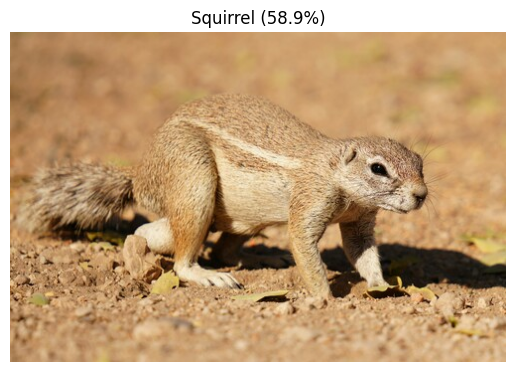

In [10]:
predict_image("test_image.jpeg")

